In [71]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

%matplotlib inline

In [35]:
df = pd.read_csv("churn_data.csv")

In [37]:
df.shape

(7032, 47)

In [ ]:
df.info

In [52]:
df.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


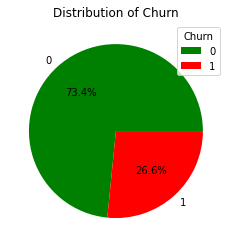

In [47]:
y = df['Churn'].value_counts()

colours = ["green","red"]

plt.pie(y, labels=y.index, autopct='%1.1f%%',colors=colours)

# Customize the appearance of the pie chart
plt.title('Distribution of Churn')
plt.legend(title='Churn')
plt.show()

<AxesSubplot:>

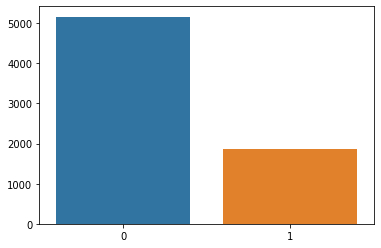

In [48]:
sns.barplot(x=y.index, y=y.values)

In [59]:
print(y.index)
print(y.values)

Int64Index([0, 1], dtype='int64')
[5163 1869]


In [61]:
df = df.drop("Unnamed: 0",axis=1)

In [64]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop the correlated features from the dataset
df2 = df.drop(df[to_drop], axis=1)

df2.head()

['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


C:\Users\aaaya\AppData\Local\Temp\ipykernel_14684\3807002334.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [84]:

X = df.drop(df[['Churn']], axis=1)

y = df['Churn']

# Create training and testing sets (here 80% of the data is used for training.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [82]:
X_train

array([[0.        , 0.26760563, 0.01442786, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.50704225, 0.76517413, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02039801, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.91549296, 0.36218905, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.45070423, 0.41094527, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.95774648, 0.71343284, ..., 0.        , 1.        ,
        0.        ]])

In [75]:
clf = LogisticRegression()

In [88]:
clf.fit(X_train, y_train)

# The predicted labels of classifier
y_pred = clf.predict(X_test)

c:\Users\aaaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [54]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [136]:
X_test2 = scaler.fit_transform(X_test.iloc[0:1])

In [135]:
X_test.iloc[0:1]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3330,0,55,20.3,1079.05,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1


In [137]:
X_test2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [141]:
y_test

3330    0
5462    0
3149    0
4388    1
5101    0
       ..
942     1
5080    0
2191    0
404     0
1366    1
Name: Churn, Length: 1407, dtype: int64

In [157]:
y_pred = clf.predict(X_test2)

In [ ]:
X_test

In [99]:
X_train

array([[0.        , 0.15492958, 0.35226707, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.92957746, 0.92575984, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.25352113, 0.06477329, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.08450704, 0.83258595, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.87323944, 0.79322372, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.05633803, 0.30692576, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y_train

In [158]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

ValueError: Found input variables with inconsistent numbers of samples: [1407, 1]